In [2]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
import os



In [20]:
def gaussian(x, w, sigma):
    return exp(-(x - w)**2/(2*sigma**2))

def square(x):
    if sin(x) > 0:
        return 1
    else:
        return -1

class RBF:
    def __init__(self, input_dim, sigma=1):
        self.w = np.random.randn(input_dim)
        self.sigma = sigma
    
    def set_node(self, w, sigma):
        self.w = w
        self.sigma = sigma

    def forward(self, X):
        return np.array([gaussian(x, self.w, self.sigma) for x in X])

class RBFnetwork:
    def __init__(self, input_dim, nb_nodes, learning_rate):
        self.learning_rate = learning_rate
        self.rbfnodes = [RBF(input_dim) for _ in range(nb_nodes)]
        self.output_weights = np.random.randn(nb_nodes)
    
    def set_rbf_node(self, index, w, sigma):
        self.rbfnodes[index].set_node(w, sigma)

    def forward(self, x):
        out = 0
        for i, node in enumerate(self.rbfnodes):
            out += self.output_weights[i] * node.forward(x)
        return out

    def total_error(self, X, f):
        out = self.forward(X)
        return ((out - f)**2).sum()

    def least_square_error_function(self, phi, f):
        phi_T = phi.T
        w = np.linalg.inv(phi_T.dot(phi)).dot(phi_T).dot(f)
        return w
    
    #Performs one step of learning using the least square error function
    def learn_step(self, x_train, y_train):
        phi = np.array([node.forward(x_train) for node in self.rbfnodes]).T
        w = self.least_square_error_function(phi, y_train)
        self.output_weights = w

    #Performs nb_epochs steps of learning using the least square error function
    def batch_learn(self, x_train, y_train):
        self.learn_step(x_train, y_train)
        
    def predict(self, x_test):
        out = self.forward(x_test)
        return out

    def mse_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return ((out - y_test)**2).sum()
    
    def abs_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return np.abs(out - y_test).sum()
    
    def residual_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return np.abs(out - y_test).sum() / len(x_test)
    


In [23]:
sin_fun = np.vectorize(sin)
square_fun = np.vectorize(square)

x_train = np.arange(0, 2*pi, 0.1)
x_test = np.arange(0.05, 2*pi, 0.1)

training_sin = sin_fun(2 * x_train)
training_square = square_fun(2 * x_train)

test_sin = sin_fun(2 * x_test)
test_square = square_fun(2*x_test)

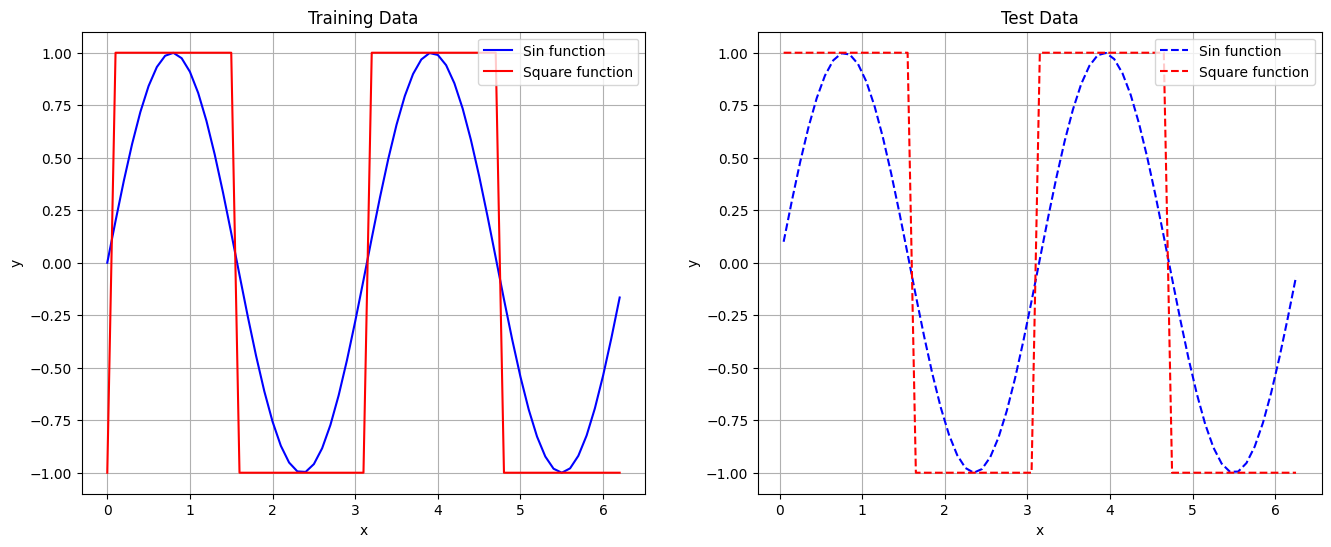

In [24]:
#Plot data
# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Plot Training Data
plt.subplot(1, 2, 1)
plt.plot(x_train, training_sin, label='Sin function', color='blue')
plt.plot(x_train, training_square, label='Square function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.legend(loc='upper right')
plt.grid(True)

# Plot Test Data
plt.subplot(1, 2, 2)
plt.plot(x_test, test_sin, label='Sin function', linestyle='--', color='blue')
plt.plot(x_test, test_square, label='Square function', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data')
plt.legend( loc='upper right')
plt.grid(True)

# plt.tight_layout()  # Ensures the subplots don't overlap

plt.show()

### 3.1 Batch mode training using least squares - supervised learning of network weights

Nodes: 010 | Error on sin: 9.20383037397375858291


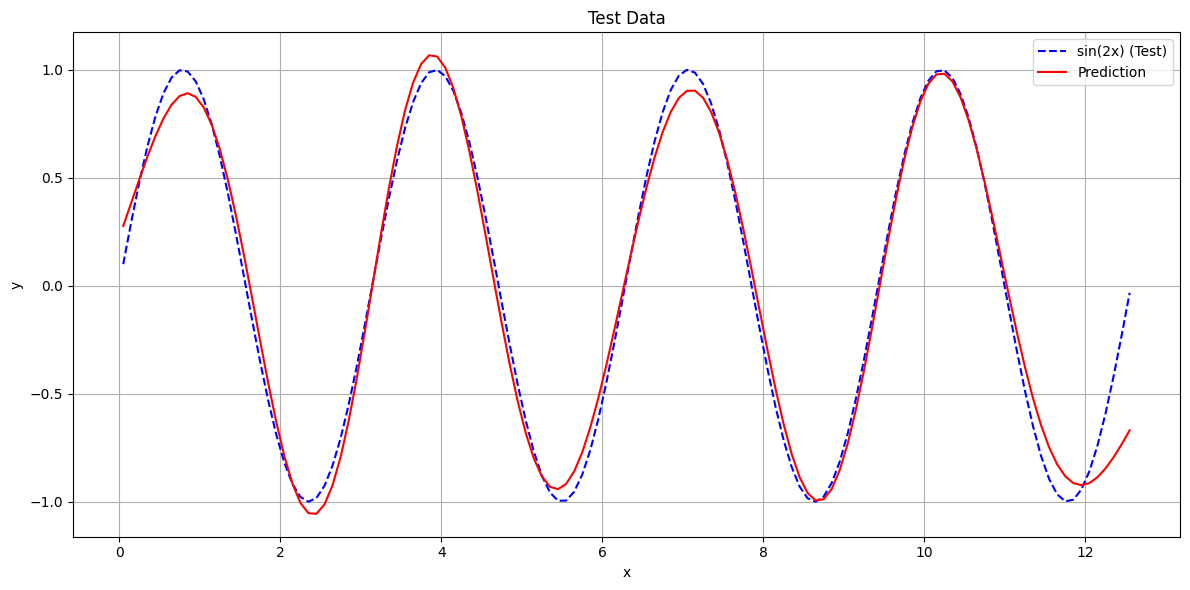

In [81]:
lr = 0.01
nb_nodes = 10
sigma = 1

network_sin = RBFnetwork(1, nb_nodes, lr)

# Place by hand the rbf nodes
# A good first approach is to divide the interval uniformally
# And use a fixed sigma
for i in range(nb_nodes):
    w = np.array(2*i*pi/nb_nodes)
    network_sin.set_rbf_node(i, w, sigma)

# Another good idea is to put more values at defining points of the curve

network_sin.batch_learn(x_train, training_sin)

abs_error = network_sin.abs_evaluate(x_test, test_sin)
print(f"Nodes: {nb_nodes:03} | Error on sin: {abs_error:.20f}")

pred = network_sin.predict(x_test)

plt.figure(figsize=(12, 6))
plt.plot(x_test, test_sin, label='sin(2x) (Test)', linestyle='--', color='blue')
plt.plot(x_test, pred, label='Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures the subplots don't overlap

plt.show()


Nodes: 001 | Error on sin: 0.57001646149452178669


<Figure size 600x300 with 0 Axes>

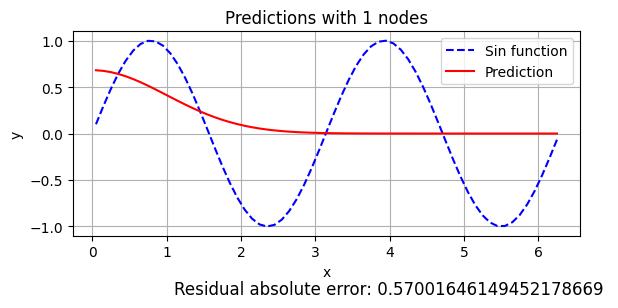

Nodes: 002 | Error on sin: 0.56994993027897167259


<Figure size 600x300 with 0 Axes>

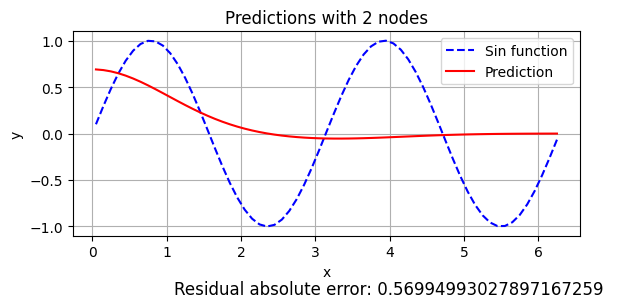

Nodes: 004 | Error on sin: 0.53135488959192633818


<Figure size 600x300 with 0 Axes>

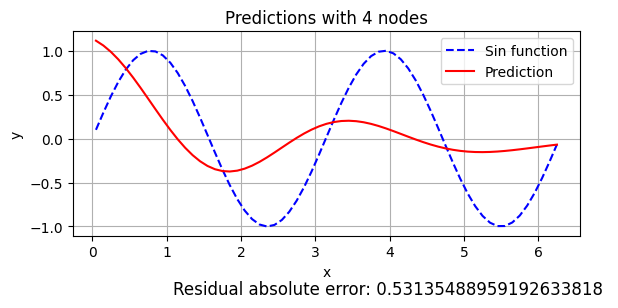

Nodes: 006 | Error on sin: 0.09115025830896089643


<Figure size 600x300 with 0 Axes>

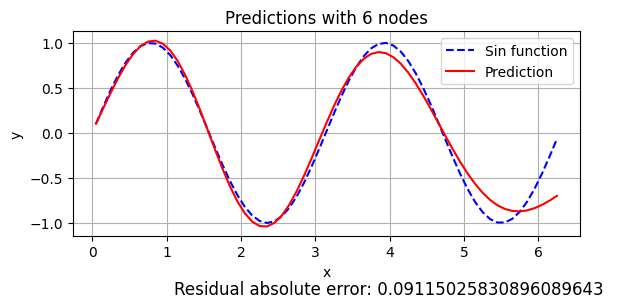

Nodes: 008 | Error on sin: 0.03771824901587892548


<Figure size 600x300 with 0 Axes>

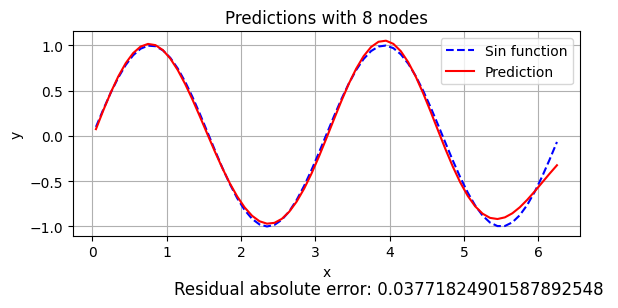

Nodes: 010 | Error on sin: 0.00849161322154083457


<Figure size 600x300 with 0 Axes>

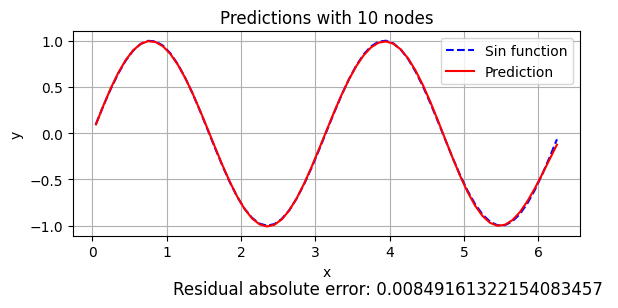

Nodes: 012 | Error on sin: 0.00119756444346555413


<Figure size 600x300 with 0 Axes>

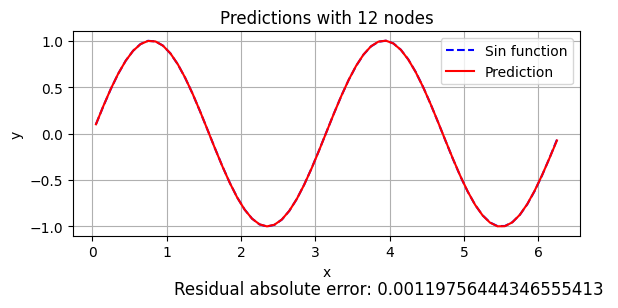

Nodes: 014 | Error on sin: 0.00012181776180058562


<Figure size 600x300 with 0 Axes>

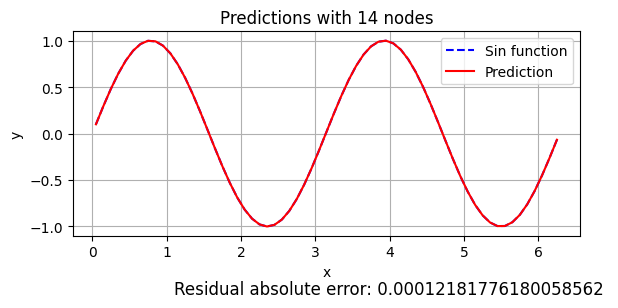

Nodes: 015 | Error on sin: 0.00229723970917679581


<Figure size 600x300 with 0 Axes>

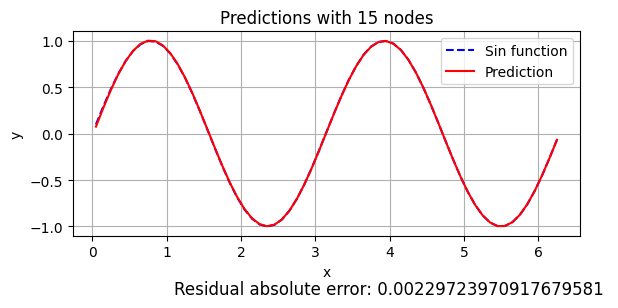

Nodes: 016 | Error on sin: 0.03547291380748449768


<Figure size 600x300 with 0 Axes>

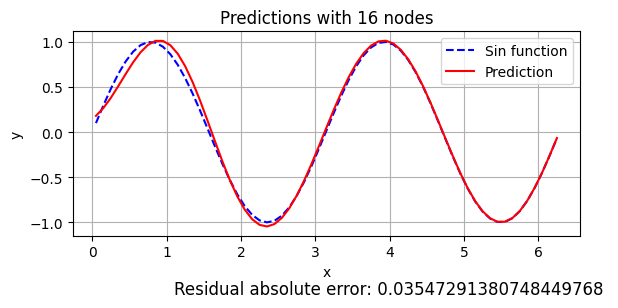

Nodes: 018 | Error on sin: 0.07270980890116617024


<Figure size 600x300 with 0 Axes>

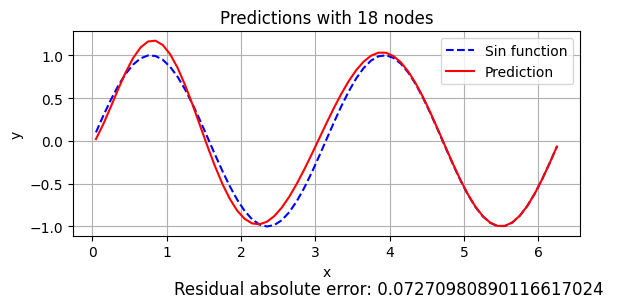

Nodes: 020 | Error on sin: 0.49704435042812034062


<Figure size 600x300 with 0 Axes>

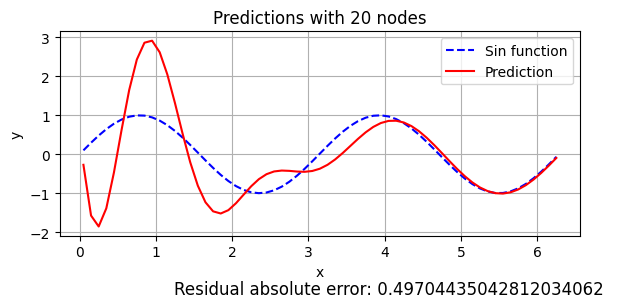

In [118]:
lr = 0.01
nb_nodes = [1, 2, 4, 6, 8, 10, 12, 14, 15, 16, 18, 20]
sigma = 1

def plot_results(test_data, pred, func_name, nb_nodes, resi):
    fig = plt.figure(figsize=(6, 3))    

    plt.plot(x_test, test_data, label=f'{func_name} function', linestyle='--', color='blue')
    plt.plot(x_test, pred, label='Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predictions with ' + str(nb_nodes) + ' nodes')
    fig.text(0.66, 0.0002, f'Residual absolute error: {resi:.20f} ', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures the subplots don't overlap

    plt.show()

#Experiment using sin function
for nb in nb_nodes:

    network_sin = RBFnetwork(1, nb, lr)

    # Place by hand the rbf nodes
    # A good first approach is to divide the interval uniformally
    # And use a fixed sigma
    for i in range(nb):
        w = np.array(2*i*pi/nb)
        network_sin.set_rbf_node(i, w, sigma)

    # Another good idea is to put more values at defining points of the curve

    network_sin.batch_learn(x_train, training_sin)

    resi_sin = network_sin.residual_evaluate(x_test, test_sin)
    print(f"Nodes: {nb:03} | Error on sin: {resi_sin:.20f}")

    pred = network_sin.predict(x_test)
    
    fig = plt.figure(figsize=(6, 3))

    plot_results(test_sin, pred, 'Sin', nb, resi_sin)
    

Nodes: 015 | Error on square: 0.21291352307271080302


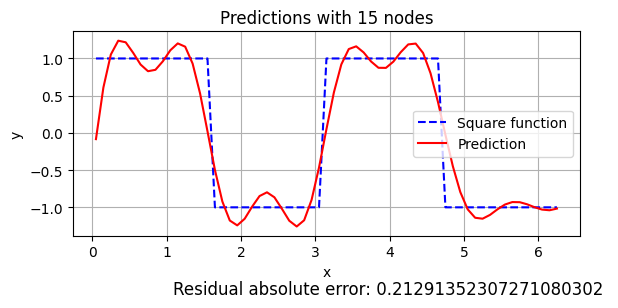

In [30]:
lr = 0.1
nb_nodes = [15]
sigma = 0.6

def plot_results(test_data, pred, func_name, nb_nodes, resi):
    fig = plt.figure(figsize=(6, 3))    

    plt.plot(x_test, test_data, label=f'{func_name} function', linestyle='--', color='blue')
    plt.plot(x_test, pred, label='Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predictions with ' + str(nb_nodes) + ' nodes')
    fig.text(0.66, 0.0002, f'Residual absolute error: {resi:.20f} ', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures the subplots don't overlap

    plt.show()

#Experiment using square function
for nb in nb_nodes:

    network_sq = RBFnetwork(1, nb, lr)

    # Place by hand the rbf nodes
    # A good first approach is to divide the interval uniformally
    # And use a fixed sigma
    #   -This idea is the same as generating gaussian noise 

    # for i in range(nb):
    #     noise = np.random.normal(3, 3, 1)
    #     w = np.array( noise)
    #     network_sq.set_rbf_node(i, w, sigma)
    
    for i in range(nb):
        w = np.array(2*i*pi/nb)
        network_sq.set_rbf_node(i, w, sigma)

    # Another good idea is to put more values at defining points of the curve

    network_sq.batch_learn(x_train, training_square)

    resi_sq = network_sq.residual_evaluate(x_test, test_square)
    print(f"Nodes: {nb:03} | Error on square: {resi_sq:.20f}")

    pred = network_sq.predict(x_test)
    
    plot_results(test_square, pred, 'Square', nb, resi_sq)

### 3.2 Regression with noise

In [ ]:
# sin_fun = np.vectorize(sin)
# square_fun = np.vectorize(square)

x_train = np.arange(0, 2*pi, 0.1)
x_test = np.arange(0.05, 2*pi, 0.1)

training_sin = sin_fun(2 * x_train)
training_square = square_fun(2 * x_train)

test_sin = sin_fun(2 * x_test)
test_square = square_fun(2*x_test)

# Add noise on inputs
x_train_noise = np.copy() # TODO